# Logistic regression 

Note: if you run this notebook on your own laptop, you may need to install the packages numpy, scikit-learn and matplotlib (perhaps via <code>pip install numpy</code> etc). If you use anaconda the packages should already be there. On google colab you do not need to do anything.

* https://numpy.org/
* https://scikit-learn.org/stable/
* https://matplotlib.org/

In [1]:
import numpy as np  ## the alias np is common for numpy
import sklearn 
import matplotlib.pyplot as plt  ## alias plt as matplotlib.pyplot is far too long
plt.style.use("seaborn-v0_8")   # for nicer plots

## Iris data set

We try out logistic regression with the iris dataset. The iris dataset is quite well-known (it has its own [wikipedia entry](https://en.wikipedia.org/wiki/Iris_flower_data_set), which is more than most of us can claim...). Have a look at the wikipedia entry or read the description below!

In [2]:
## load iris data set 
## see https://en.wikipedia.org/wiki/Iris_flower_data_set
from sklearn.datasets import load_iris
iris=load_iris()
X=iris.data    ### we put the data in a matrix X
y=iris.target  ### we put the classes, ie, which flower it is, in a vector y
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

The iris dataset is 4-dim (each flower is characterised by four features), and contains data on 150 iris flowers:

In [3]:
X.shape   ## shape gives the dimensions of a numpy array

(150, 4)

It's always good to have a peak at the data.

In [4]:
X[:5]   # let's look at the first five rows

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [5]:
y[:5]  # let's look at the first five entries

array([0, 0, 0, 0, 0])

To get a feeling for the data set we do several plots in 2d.

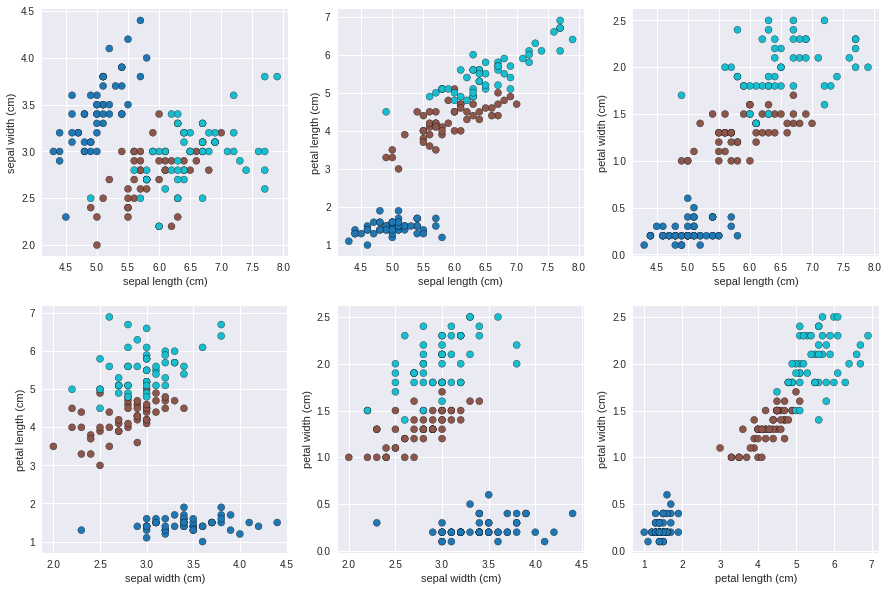

In [6]:
fig,axs=plt.subplots(2,3,figsize=(15,10))
axs=axs.flat   ### this is a nice numpy command that "flattens" a multi-dimensional array to a 1-dimensional list
ax_counter=0
for i in range(4):
    for j in range(i+1,4):
        ax=axs[ax_counter]
        ### c=y means that the plot colours differ by y, ie the class, which is exactly what we want
        ### with cmap we can choose different colour maps; I chose the colour map "tab10"
        ### setting edgecolor to black simply gives a nice thin black line around the markers -- looks better 
        ax.scatter(X[:,i],X[:,j],c=y,cmap="tab10",edgecolor="black")    
        ax.set_xlabel(iris.feature_names[i])
        ax.set_ylabel(iris.feature_names[j])
        ax_counter+=1

We see that one class can relatively easily be separated from the other two. The other two classes, however, seem to overlap -- at least in the two-dimensional projections.

## Logistic Regression

Logistic regression is a linear predictor. That means, in particular, that it does binary classification. (Well, if you try out the logistic regression method of scikit-learn on more than two classes, you'll see that it still works -- how this is done will be discussed later.) So, we split the flowers into two classes:
first, we split the dataset into iris versicolor and the rest.

In [7]:
y_versicolor = (y==1)   ## y==1 is a boolean array that is True precisely when the class is 1
# this boolean array we put in y_versicolor
# in python, False is the same as 0, and True is anything but 0 -- thus y_versicolor is effectively a 0,1-vector
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(solver='lbfgs')

What is the mysterious solver that is set to 'lbfgs'? Behind the hood a numerical optimisation algorithm is doing all the heavy lifting. It's possible to switch between several different of these algorithms. 'lbfgs' is simply one that seems to work quite well. For alternatives and more options, please consult the documentation.

Next we fit, ie train, the dataset, that is, we compute the linear classifier and then determine the zero-one training loss. All classifiers in <code>scikit-learn</code> offer a method called <code>fit</code> for this purpose. The method <code>predict</code> that also all classifiers share simply returns the predicted classes.

In [8]:
logreg.fit(X,y_versicolor)

from sklearn.metrics import zero_one_loss
zero_one_loss(y_versicolor,logreg.predict(X))

0.2733333333333333

To see what's happening, we restrict the dataset to only two features, sepal length and sepal width. Then we can plot the classification or decision boundary of the logistic regression classifier in contrast to the true classes. The decision boundary shows how how any data point in the space (here the plane) would have been classified. Since logistic regression is a linear classifier, we'll simply see an affine hyperplane, ie, a line separating the two classes.

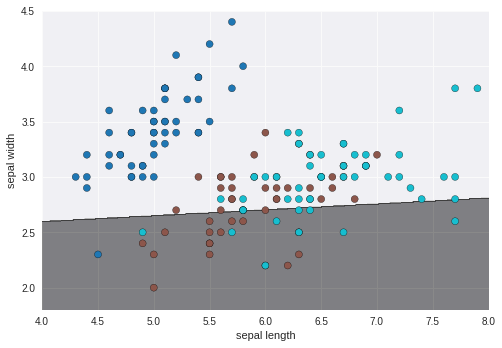

In [9]:
# let's do this again with just two features
# we pick here just the first two features, sepal length and sepal width
# the syntax X[:,:2] means: take all rows of X, and of the columns take only 0:2, so only the columns 0 and 1
# (in python, array indices start with 0 and the upper bound is usually excluded)
logreg.fit(X[:,:2],y_versicolor)

fig,ax=plt.subplots()

## this is code to plot the decision boundary
## best to ignore this bit of code
resolution=500
L1=np.linspace(4,8,num=resolution)
L2=np.linspace(1.8,4.5,num=resolution)
XX,YY=np.meshgrid(L1,L2)
Z=logreg.predict(np.array([XX.flatten(),YY.flatten()]).T)
Z=Z.reshape(XX.shape)
ax.contourf(XX,YY,Z,alpha=0.5)

## now we plot the data set with the true class
ax.scatter(X[:,0],X[:,1],c=y,edgecolor='black',cmap="tab10")
ax.set_xlabel("sepal length")
ax.set_ylabel("sepal width")
plt.show()

As we can see, it's very difficult to separate iris versicolor from the other iris flowers.

We do this again, only now we do iris setosa against the others, again with just two features.

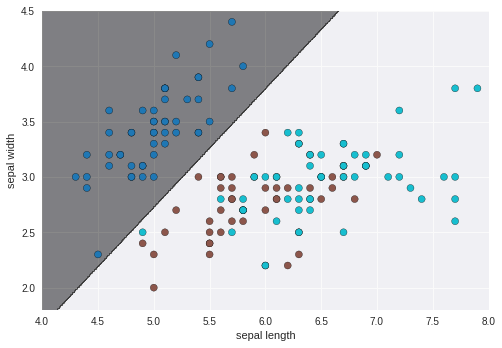

In [10]:
y_setosa=(y==0)
logreg.fit(X[:,:2],y_setosa)

fig,ax=plt.subplots()

## this is code to plot the decision boundary
## best to ignore this bit of code
resolution=500
L1=np.linspace(4,8,num=resolution)
L2=np.linspace(1.8,4.5,num=resolution)
XX,YY=np.meshgrid(L1,L2)
Z=logreg.predict(np.array([XX.flatten(),YY.flatten()]).T)
Z=Z.reshape(XX.shape)
ax.contourf(XX,YY,Z,alpha=0.5)

## now we plot the data set with the true class
ax.scatter(X[:,0],X[:,1],c=y,edgecolor='black',cmap="tab10")
ax.set_xlabel("sepal length")
ax.set_ylabel("sepal width")
plt.show()

For completeness we also separate virginica from the others.

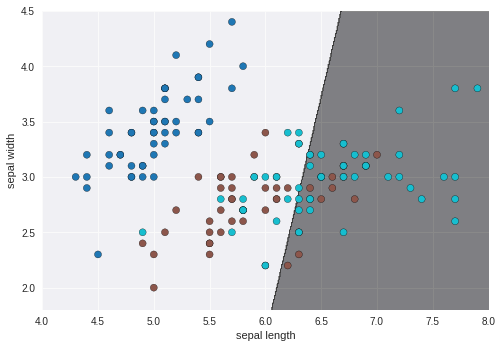

In [11]:
y_virginica=(y==2)
logreg.fit(X[:,:2],y_virginica)

fig,ax=plt.subplots()

## this is code to plot the decision boundary
## best to ignore this bit of code
resolution=500
L1=np.linspace(4,8,num=resolution)
L2=np.linspace(1.8,4.5,num=resolution)
XX,YY=np.meshgrid(L1,L2)
Z=logreg.predict(np.array([XX.flatten(),YY.flatten()]).T)
Z=Z.reshape(XX.shape)
ax.contourf(XX,YY,Z,alpha=0.5)

## now we plot the data set with the true class
ax.scatter(X[:,0],X[:,1],c=y,edgecolor='black',cmap="tab10")
ax.set_xlabel("sepal length")
ax.set_ylabel("sepal width")
plt.show()

## Play with the code

Train the logistic regression classifier with all three classes and determine the training error. How many flowers are misclassified? If you're particularly ambitious plot how the decision boundary looks like in all the two-dimensional projections.

You may encounter a warning that the solver did not converge. In that case, increase the number of iterations the solver is allowed to perform, like this:

<code>logreg=LogisticRegression(solver='lbfgs',max_iter=1000)</code>